# Testing Log of negative numbers

In [2]:
a = [1,10,100,-10,-np.e]
x = torch.tensor(a,dtype=complex)
print(torch.log(x))
x = np.array(a,dtype=complex)
np.log(x)

tensor([0.0000+0.0000j, 2.3026+0.0000j, 4.6052+0.0000j, 2.3026+3.1416j,
        1.0000+3.1416j], dtype=torch.complex128)


array([0.        +0.j        , 2.30258509+0.j        ,
       4.60517019+0.j        , 2.30258509+3.14159265j,
       1.        +3.14159265j])

# Pipeline

In [60]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torchaudio
import torchaudio.datasets
from IPython.display import Audio

#run in case files are deleted
'''
!git init
!git remote add origin https://github.com/ChiragSehga1/TrainingParadigms.git
!git clone https://github.com/ChiragSehga1/TrainingParadigms.git
'''

'\n!git init\n!git remote add origin https://github.com/ChiragSehga1/TrainingParadigms.git\n!git clone https://github.com/ChiragSehga1/TrainingParadigms.git\n'

Total Training Batches: 15000
Total Testing Batches: 2500
Batch Size: torch.Size([4, 1, 28, 28])


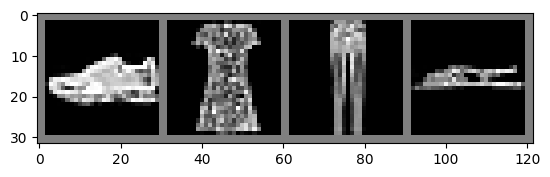

Sneaker Dress Trouser Sandal


In [61]:
from Supervised import dataloader as dl
batchSize = 4
fashionTrain,fashionTest,fashionClasses = dl.Fashion(batchSize=batchSize)
def imshow(img,mean=0.5,variance=0.5):
    img = img*variance + mean     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(fashionTrain)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{fashionClasses[labels[j]]:5s}' for j in range(batchSize)))

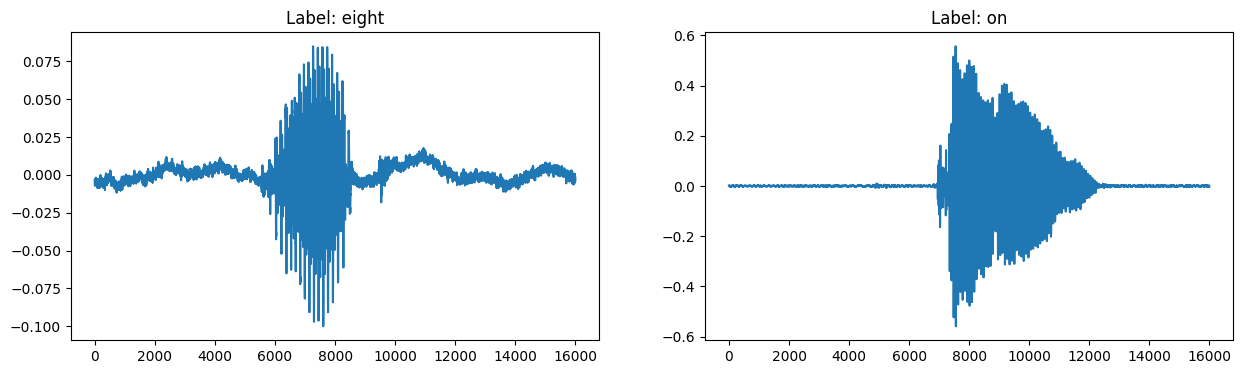

In [63]:
from Supervised import dataloader as dl

batchSize = 2
speechTrain, speechTest, speechClasses = dl.Speech(batchSize)
dataiter = iter(speechTrain)
waveforms, sample_rates, labels, *_ = next(dataiter)

# Create subplots
fig, axes = plt.subplots(1, batchSize, figsize=(15, 4))
if batchSize == 1:
    axes = [axes]
# Plot the waveforms
for i in range(batchSize):
    waveform = waveforms[i].numpy()
    axes[i].plot(waveform[0])  # Plot the first channel
    axes[i].set_title(f"Label: {labels[i]}")
plt.show()

#AUDIO
waveform_np = waveforms[0].numpy()
# If multi-channel, select the first channel
if waveform_np.shape[0] > 1:
    waveform_np = waveform_np[0]
# Normalize the waveform to the range [-1, 1]
waveform_np = waveform_np.astype(np.float32)  
waveform_np /= np.max(np.abs(waveform_np))  # Prevent clipping
# Convert sample rate to an integer
sample_rate = int(sample_rates[0].item())
Audio(waveform_np, rate=sample_rate)

# Testing out Custom DataLoader

In [64]:
import importlib
from Unsupervised import dataloader as Udl
#importlib.reload(Udl)  # Force reload if not showing saved changes

rootDir = "./data/SpeechCommands/speech_commands_v0.02"
dataset = Udl.TripletLoader(rootDir,transform = None,triplet = True)

In [65]:
sample = dataset[1600]

print("Anchor shape:", sample['anchor'].shape)
print("Anchor Class:", sample['anchorClass'])
print("Positive shape:", sample['positive'].shape)
print("Positive Class:", sample['positiveClass'])
print("Negative shape:", sample['negative'].shape)
print("Negative Class:", sample['negativeClass'])
print("Sample Rate:", sample['sampleRate'])

Anchor shape: torch.Size([1, 16000])
Anchor Class: eight
Positive shape: torch.Size([1, 16000])
Positive Class: eight
Negative shape: torch.Size([1, 16000])
Negative Class: down
Sample Rate: 16000


# Testing ResNet models

In [66]:
from Unsupervised import model as Um
importlib.reload(Um)  # Force reload if not showing saved changes

model = Um.ResNet18(10,1)

import torch

batch_size = 4
num_classes = 10
in_channels = 1  # Change if your input has more channels
seq_length = 16000  # Example: 1 second of audio sampled at 16kHz

# Create random input tensor
x = torch.randn(batch_size, in_channels, seq_length)

resnet18 = Um.ResNet18(numClasses=num_classes, inChannels=in_channels)
resnet50 = Um.ResNet50(numClasses=num_classes, inChannels=in_channels)
resnet101 = Um.ResNet101(numClasses=num_classes, inChannels=in_channels)

In [67]:
output18 = resnet18(x)
print("ResNet18 Output Shape: ", output18.shape)

output34 = resnet18(x)
print("ResNet34 Output Shape: ", output34.shape)

output50 = resnet50(x)
print("ResNet50 Output Shape: ", output50.shape)

output101 = resnet101(x)
print("ResNet101 Output Shape:", output101.shape)

ResNet18 Output Shape:  torch.Size([4, 10])
ResNet34 Output Shape:  torch.Size([4, 10])
ResNet50 Output Shape:  torch.Size([4, 10])
ResNet101 Output Shape: torch.Size([4, 10])
